# Technique: 07 Clustering Visual Examples

### What is this?
In this notebook, we look at different ways to see clusters. The most important picture is the **Dendrogram**. It looks like a tree.

### Why use it?
1. It shows the "Hierarchy" (the levels) of your data.
2. It helps you see how small groups join together to make one big group.
3. It helps you decide how many clusters you need.

### Key Visual:
* **Cluster Dendrogram**: A tree-like graph that shows the distance between objects.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_generator import generate_dtt_dataset, GLOBAL_SEED

# Initialize Dataset
df = generate_dtt_dataset()
print(f'Dataset loaded with Global Seed: {GLOBAL_SEED}')
df.head()

Dataset loaded with Global Seed: 888


,Age,Annual_Salary,Household_Size,Education_Level,Region,Cluster_Feature_1,Cluster_Feature_2,Transaction_Amount
0,47,293814.560245,2.219505,Master,North,-0.666995,8.207288,3.257499
1,63,293814.560245,1.967882,High School,East,-1.843954,-8.553721,68.050678
2,55,293814.560245,1.828750,PhD,East,6.498745,-7.157678,8.111841
3,36,293814.560245,1.772328,Bachelor,East,-1.257460,-8.568788,27.766274
4,42,293814.560245,3.174114,Master,North,8.144192,-6.575686,13.867245


In [18]:
df = generate_dtt_dataset(n_samples=50)
cluster_data = df[['Cluster_Feature_1', 'Cluster_Feature_2']]
cluster_data.head()

,Cluster_Feature_1,Cluster_Feature_2
0,-1.158618,-9.434461
1,0.766270,8.662192
2,6.788813,-6.685464
3,1.118823,9.786602
4,7.291450,-7.808557


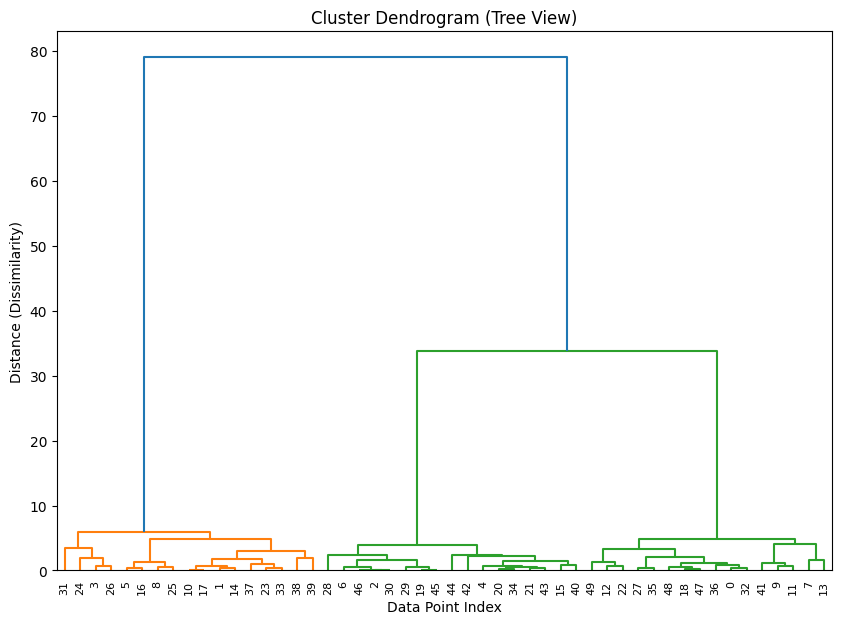

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Calculate the 'linkage' (how points join together)
# 'ward' is a common method to minimize variance
Z = linkage(cluster_data, method='ward')

# 2. Draw the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Cluster Dendrogram (Tree View)")
plt.xlabel("Data Point Index")
plt.ylabel("Distance (Dissimilarity)")
plt.show()

## Scatterplot with Cluster Boundaries
This is another way to see clusters. We can draw the points and use colors to show the groups, just like the examples in the slides.

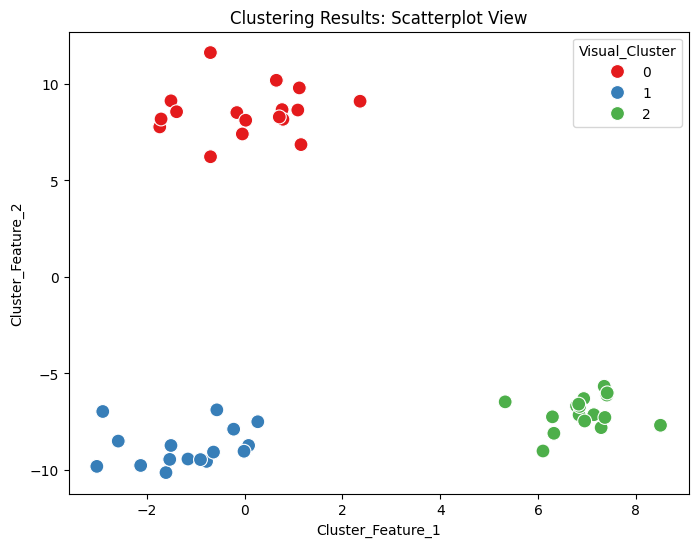

In [20]:
from sklearn.cluster import AgglomerativeClustering

# 1. Use Agglomerative Clustering (Bottom-Up approach)
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Visual_Cluster'] = cluster.fit_predict(cluster_data)

# 2. Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cluster_Feature_1', y='Cluster_Feature_2', 
                hue='Visual_Cluster', data=df, palette='Set1', s=100)
plt.title("Clustering Results: Scatterplot View")
plt.show()

### Summary from Lecture Slides:
* **Dendrogram**: This is a "Bottom-Up merge" (Agglomerative) view.
* **Distance**: The height of the tree shows the distance (dissimilarity) between objects.
* **Groups**: Objects in a cluster are similar, yet dissimilar to objects in other clusters.